In [81]:
# standardized modules
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split

# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


#my modules
import src.acquire as ac
import src.prepare as pp
import src.helper

#turn off the red warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
np.random.seed(7)

### Acquire and Prepare Data

In [3]:
titan = ac.get_titanic_data()

In [4]:
titan.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


- Question for myself  

Why isn't baseline 50/50? 

Shouldn't it be a problem to get the answer correct at about a coin flip's level of accuracy? 




In [6]:
t_train, t_validate, t_test = pp.prep_titanic_data(titan)
t_train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


In [10]:
# Processing for modeling
x_train = t_train.drop(columns=['survived', 'sex', 'embark_town'])
y_train = t_train.survived

x_validate = t_validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate = t_validate.survived

x_test = t_test.drop(columns=['survived', 'sex', 'embark_town'])
y_test = t_test.survived

In [11]:
x_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,36.000000,0,0,40.1250,1,1,0,0
165,3,9.000000,0,2,20.5250,0,1,0,1
50,3,7.000000,4,1,39.6875,0,1,0,1
259,2,50.000000,0,1,26.0000,0,0,0,1
306,1,29.678105,0,0,110.8833,1,0,0,0


In [13]:
y_train[:5]

583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

In [15]:
#validate that each X sample section has the correct shape whem compared to Y's shape:
x_train.shape, x_validate.shape, x_test.shape

((498, 9), (214, 9), (179, 9))

In [16]:
y_train.shape, y_validate.shape, y_test.shape

((498,), (214,), (179,))

### Exercises
1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [20]:
# y_train is a series wherein it captures the 'survived' column from the main dataset
y_train[0:10]

583    0
165    1
50     0
259    1
306    1
308    0
314    0
883    0
459    0
180    0
Name: survived, dtype: int64

In [21]:
# 0 perished, 1 survived
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [40]:
# because it is binary, using the mean of y_train to determine 
if y_train.mean() > .49:
    baseline = 1
else: 
    baseline = 0


In [41]:
# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


### Baseline accuracy: 62%

## Question 2: Fit-Transform
- Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [42]:
# Create the decision tree object and specify hyperparams
# this specifies our algorithm
t_tree1 = DecisionTreeClassifier(max_depth = 3, random_state = 7)

In [43]:
# this step creates our model

t_tree1.fit(x_train,y_train)

# or done differently:
# model1 = algorithm.fit(X_train, y_train)
# Rudimentary visualization of model structure

DecisionTreeClassifier(max_depth=3, random_state=7)

In [44]:
# use the model
# first, evaluate x_train and filling y_predictions with the evaluation
y_predictions = t_tree1.predict(x_train)

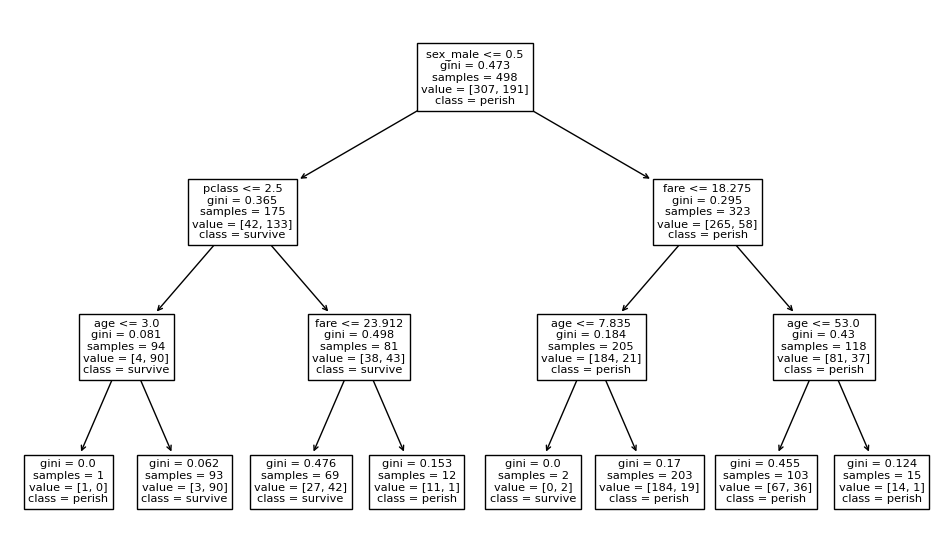

In [46]:
plt.figure(figsize=(12,7))
plot_tree(t_tree1, feature_names=x_train.columns, class_names=['perish','survive'])
plt.show()

## Question 3: Evaluate Performance
- Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [54]:
print('Decision tree 1 has an accuracy rate of :',round(t_tree1.score(x_train, y_train),2),'%')

Decision tree 1 has an accuracy rate of : 0.83 %


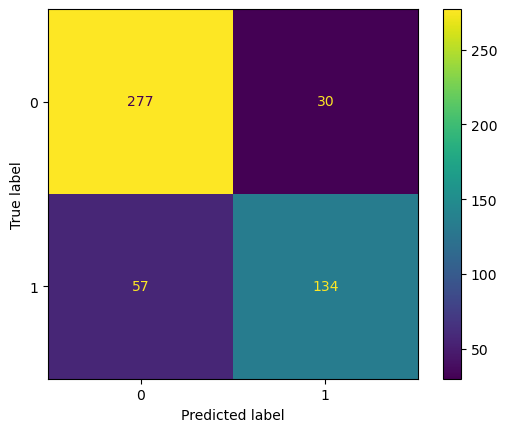

In [55]:
plot_confusion_matrix(t_tree1, x_train, y_train)

In [56]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [57]:
t_report = classification_report(y_train, y_predictions, output_dict=True)
print('Tree of 1 depth')
pd.DataFrame(t_report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.829341,0.817073,0.825301,0.823207,0.824636
recall,0.902280,0.701571,0.825301,0.801925,0.825301
f1-score,0.864275,0.754930,0.825301,0.809602,0.822337
support,307.000000,191.000000,0.825301,498.000000,498.000000


## Question 4: Calculate Metrics
Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [64]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
cm = (TN, FP, FN, TP)

In [69]:
print(*cm, sep='\n')

277
30
57
134


In [71]:
negative_cases = TN + FP
positive_cases = FN + TP
print('Survived:',positive_cases)
print('Perished:',negative_cases)
print(y_train.value_counts())

Survived: 191
Perished: 307
0    307
1    191
Name: survived, dtype: int64


In [72]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8253012048192772 

True Positive Rate/Sensitivity/Recall/Power: 0.7015706806282722 

False Positive Rate/False Alarm Ratio/Fall-out: 0.09771986970684039 

True Negative Rate/Specificity/Selectivity: 0.9022801302931596 

False Negative Rate/Miss Rate: 0.29842931937172773 

Precision/PPV: 0.8170731707317073 

F1 Score: 0.7549295774647887 

Support (0): 307 

Support (1): 191


## Question 5:
Run through steps 2-4 using a different max_depth value.



In [74]:
#getting loopy with it

for i in range(1, 16):
    # making model: algorithm applied to variable
    tree = DecisionTreeClassifier(max_depth=i, random_state=7)
    
    # fit the model 
    # save applied data to algorithm
    tree = tree.fit(x_train, y_train)
    
    # predict outcomes using model by applying to them data from train, save results in new variable
    y_predictions = tree.predict(x_train)
    
    # produce classification report from actual y values and the predicted values conjured by previous variable
    report = classification_report(y_train, y_predictions, output_dict=True)
    print('True with max depth of:', i)
    print(pd.DataFrame(report))
    print()

True with max depth of: 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

True with max depth of: 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

True with max depth of: 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score  

# Random Forests Exercises

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [101]:
titanic = ac.get_titanic_data()

In [102]:
train, val, test = pp.prep_titanic_data(titanic)

In [103]:
x_train = train.drop(columns=['survived','sex','embark_town'])
y_train = train['survived']

x_validate = t_validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate = t_validate.survived

x_test = t_test.drop(columns=['survived', 'sex', 'embark_town'])
y_test = t_test.survived

In [104]:
rf = RandomForestClassifier(
    min_samples_leaf=1,
    max_depth=10,
    random_state=13
)

In [105]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=13)

In [106]:
y_pred = rf.predict(x_train)

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [107]:
rf.score(x_train, y_train)

0.963855421686747

In [86]:
confusion_matrix(y_train,y_pred)

array([[307,   0],
       [ 18, 173]])

In [88]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       307
           1       1.00      0.91      0.95       191

    accuracy                           0.96       498
   macro avg       0.97      0.95      0.96       498
weighted avg       0.97      0.96      0.96       498



In [91]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
cm = (TN, FP, FN, TP)
print(*cm, sep='\n')

307
0
2
189


In [93]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}")
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}")
print(f"False Negative Rate/Miss Rate: {false_negative_rate}")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1_score}")
print(f"Support (0): {support_neg}")
print(f"Support (1): {support_pos}")

Accuracy: 0.9959839357429718 

True Positive Rate/Sensitivity/Recall/Power: 0.9895287958115183
False Positive Rate/False Alarm Ratio/Fall-out: 0.0
True Negative Rate/Specificity/Selectivity: 1.0
False Negative Rate/Miss Rate: 0.010471204188481676
Precision/PPV: 1.0
F1 Score: 0.9947368421052631
Support (0): 307
Support (1): 191


4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [108]:
many_models = y_train.copy()

for i in range(1, 6):
    
    rf = RandomForestClassifier(
        min_samples_leaf=1,
        max_depth=11-i,
        random_state=13
    )               
    rf.fit(x_train, y_train)
    curr_pred = rf.predict(x_train)
    many_models[f'min_samp_leaf_{i}'] = curr_pred 

In [109]:
many_models

583                                                                0
165                                                                1
50                                                                 0
259                                                                1
306                                                                1
                                         ...                        
min_samp_leaf_1    [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
min_samp_leaf_2    [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
min_samp_leaf_3    [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
min_samp_leaf_4    [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
min_samp_leaf_5    [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
Name: survived, Length: 503, dtype: object

5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [100]:
actuals = many_models.survived
pred = many_models.drop(columns = 'survived')

for column in pred.columns:
    
    accuracy = (actuals == pred[column]).mean()
    print(column, 'accuracy:', accuracy)

AttributeError: 'Series' object has no attribute 'survived'